In [1]:
import pandas as pd
import numpy as np

In [2]:
education = pd.read_csv('combined_csv.csv')

In [3]:
education.head()

,Newspaper,Heading,Date,Time,URL
0,Hindiustan Times,"KEAM Result 2019: Engineering, Pharmacy entran...",2019-05-22,12:53:00,https://www.hindustantimes.com/education/keam-...
1,Hindiustan Times,Rajasthan Board RBSE 12th arts result 2019 dec...,2019-05-22,15:19:00,https://www.hindustantimes.com/education/rajas...
2,Hindiustan Times,"RBSE 12th arts result 2019 declared, check you...",2019-05-22,15:19:00,https://www.hindustantimes.com/education/rbse-...
3,Hindiustan Times,"No taker, Bhagalpur varsity drops PG course in...",2019-05-22,18:14:00,https://www.hindustantimes.com/education/no-ta...
4,Hindiustan Times,NIOS D.El.Ed 4th Semester Result 2019 declared...,2019-05-22,17:33:00,https://www.hindustantimes.com/education/nios-...


In [4]:
education['Heading'][1]

'Rajasthan Board RBSE 12th arts result 2019 declared, here’s the direct link to check marks'

In [5]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.decomposition import TruncatedSVD

In [6]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
stopset = set(stopwords.words('english'))

In [8]:
#### Delete This
#from sklearn.datasets import fetch_20newsgroups
#categories = ['rec.sport.baseball']
#dataset = fetch_20newsgroups(subset='all',shuffle=True, random_state=42, categories=categories)
#corpus=dataset.data


In [9]:
df=education[education['Date']=='2019-05-22']

In [10]:
Heading = df['Heading']

In [11]:
#corpus=list(Heading)

In [12]:
#vectorizer = TfidfVectorizer(stop_words=stopset,use_idf=True, ngram_range=(1, 3))
#X = vectorizer.fit_transform(corpus)

In [13]:
#X.shape

In [14]:
#X[0]

In [15]:
#print(X[0])

Tokenizing and Stemming

In [16]:
import nltk
import re

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [18]:
def tokenize_and_stem(text):
   
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []

    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):

    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
   
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [19]:
tokenize_only('Rajasthan Board RBSE 12th arts result 2019 declared, here’s the direct link to check marks')

['rajasthan',
 'board',
 'rbse',
 '12th',
 'arts',
 'result',
 'declared',
 'here',
 's',
 'the',
 'direct',
 'link',
 'to',
 'check',
 'marks']

In [20]:
tokenize_and_stem('Rajasthan Board RBSE 12th arts result 2019 declared, here’s the direct link to check marks')

['rajasthan',
 'board',
 'rbse',
 '12th',
 'art',
 'result',
 'declar',
 'here',
 's',
 'the',
 'direct',
 'link',
 'to',
 'check',
 'mark']

In [21]:

Heading_stemmed = []
Heading_tokenized = []
for i in Heading:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'Heading', tokenize/stem
    Heading_stemmed.extend(allwords_stemmed) #extend the 'Heading_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    Heading_tokenized.extend(allwords_tokenized)

In [22]:
Heading_tokenized

['keam',
 'result',
 'engineering',
 'pharmacy',
 'entrance',
 'score',
 'published',
 'here',
 's',
 'direct',
 'link',
 'to',
 'check',
 'rajasthan',
 'board',
 'rbse',
 '12th',
 'arts',
 'result',
 'declared',
 'here',
 's',
 'the',
 'direct',
 'link',
 'to',
 'check',
 'marks',
 'rbse',
 '12th',
 'arts',
 'result',
 'declared',
 'check',
 'your',
 'rajasthan',
 'board',
 'marks',
 'at',
 'rajresults.nic.in',
 'no',
 'taker',
 'bhagalpur',
 'varsity',
 'drops',
 'pg',
 'course',
 'in',
 'angika',
 'nios',
 'd.el.ed',
 '4th',
 'semester',
 'result',
 'declared',
 'here',
 's',
 'direct',
 'link',
 'to',
 'check',
 'uppsc',
 'pcs',
 'mains',
 'just',
 'one',
 'day',
 'left',
 'to',
 'apply',
 'for',
 'the',
 'exam',
 'rajasthan',
 'board',
 'rbse',
 '12th',
 'arts',
 'result',
 'declared',
 'here',
 's',
 'the',
 'direct',
 'link',
 'to',
 'check',
 'marks',
 'rbse',
 '12th',
 'arts',
 'result',
 'declared',
 'check',
 'your',
 'rajasthan',
 'board',
 'marks',
 'at',
 'rajresults.nic.

In [23]:
Heading_stemmed

['keam',
 'result',
 'engin',
 'pharmaci',
 'entranc',
 'score',
 'publish',
 'here',
 's',
 'direct',
 'link',
 'to',
 'check',
 'rajasthan',
 'board',
 'rbse',
 '12th',
 'art',
 'result',
 'declar',
 'here',
 's',
 'the',
 'direct',
 'link',
 'to',
 'check',
 'mark',
 'rbse',
 '12th',
 'art',
 'result',
 'declar',
 'check',
 'your',
 'rajasthan',
 'board',
 'mark',
 'at',
 'rajresults.nic.in',
 'no',
 'taker',
 'bhagalpur',
 'varsiti',
 'drop',
 'pg',
 'cours',
 'in',
 'angika',
 'nio',
 'd.el.',
 '4th',
 'semest',
 'result',
 'declar',
 'here',
 's',
 'direct',
 'link',
 'to',
 'check',
 'uppsc',
 'pcs',
 'main',
 'just',
 'one',
 'day',
 'left',
 'to',
 'appli',
 'for',
 'the',
 'exam',
 'rajasthan',
 'board',
 'rbse',
 '12th',
 'art',
 'result',
 'declar',
 'here',
 's',
 'the',
 'direct',
 'link',
 'to',
 'check',
 'mark',
 'rbse',
 '12th',
 'art',
 'result',
 'declar',
 'check',
 'your',
 'rajasthan',
 'board',
 'mark',
 'at',
 'rajresults.nic.in',
 'high',
 'court',
 'seek',
 '

In [24]:
words_frame = pd.DataFrame({'words': Heading_tokenized}, index = Heading_stemmed)

In [25]:
words_frame.head(10)

,words
keam,keam
result,result
engin,engineering
pharmaci,pharmacy
entranc,entrance
score,score
publish,published
here,here
s,s
direct,direct


TF-IDF

In [26]:
##Important : min_df
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

In [27]:
tfidf_matrix = vectorizer.fit_transform(Heading)

In [28]:
print(tfidf_matrix.shape)

(55, 749)


In [29]:
print(tfidf_matrix)

  (0, 363)	0.187324067301381
  (0, 557)	0.07421976381828795
  (0, 277)	0.2021327858842937
  (0, 462)	0.187324067301381
  (0, 280)	0.2021327858842937
  (0, 621)	0.17583753278485234
  (0, 488)	0.2021327858842937
  (0, 603)	0.14558063414274716
  (0, 245)	0.14015709762262274
  (0, 378)	0.14015709762262274
  (0, 164)	0.10990019898051755
  (0, 364)	0.187324067301381
  (0, 584)	0.2021327858842937
  (0, 278)	0.2021327858842937
  (0, 463)	0.2021327858842937
  (0, 281)	0.2021327858842937
  (0, 623)	0.2021327858842937
  (0, 489)	0.2021327858842937
  (0, 606)	0.16645235072206407
  (0, 246)	0.14558063414274716
  (0, 379)	0.16645235072206407
  (0, 366)	0.2021327858842937
  (0, 585)	0.2021327858842937
  (0, 279)	0.2021327858842937
  (0, 464)	0.2021327858842937
  :	:
  (53, 393)	0.23536970500013044
  (53, 445)	0.23536970500013044
  (53, 581)	0.23536970500013044
  (53, 238)	0.23536970500013044
  (54, 557)	0.09346125576842518
  (54, 164)	0.13839185248644065
  (54, 421)	0.20960516341952026
  (54, 205)	0.

In [30]:
vectorizer.get_feature_names()

["'s",
 "'s bhawna",
 "'s bhawna complet",
 "'s direct",
 "'s direct link",
 '10th',
 '10th 12th',
 '10th 12th result',
 '10th result',
 '10th result bseodisha.nic.in',
 '12th',
 '12th art',
 '12th art result',
 '12th result',
 '12th result announc',
 '12th result art',
 '12th result declar',
 '1st',
 '1st stage',
 '1st stage cbt',
 '4th',
 '4th semest',
 '4th semest exam',
 '4th semest result',
 'admiss',
 'admiss phd',
 'admiss phd student',
 'admiss process',
 'admiss process wednesday',
 'admiss schedul',
 'admiss schedul re-evalu',
 'admiss ug',
 'admiss ug pg',
 'admit',
 'admit card',
 'admit card cs',
 'admit card june',
 'align',
 'align admiss',
 'align admiss schedul',
 'angika',
 'announc',
 'announc admiss',
 'announc admiss ug',
 'announc bseh.org.in',
 'announc cee.kerala.gov.in',
 'announc cee.kerala.gov.in check',
 'announc dled.nios.ac.in',
 'announc dled.nios.ac.in check',
 'appli',
 'appli exam',
 'applic',
 'applic pass',
 'aprdc',
 'aprdc cet',
 'aprdc cet result'

In [31]:
terms = vectorizer.get_feature_names()

Cosine similarity

In [32]:
from sklearn.metrics.pairwise import cosine_similarity


In [33]:
dist = 1 - cosine_similarity(tfidf_matrix)

In [34]:
dist.shape

(55, 55)

In [35]:
print(dist)

[[ 0.00000000e+00  7.55919797e-01  9.78311711e-01 ...  9.93343086e-01
   9.93585646e-01  9.77854036e-01]
 [ 7.55919797e-01 -2.22044605e-16  6.15136897e-01 ...  9.54123697e-01
   9.60685592e-01  9.74270777e-01]
 [ 9.78311711e-01  6.15136897e-01 -4.44089210e-16 ...  9.51303351e-01
   9.58268654e-01  9.72689017e-01]
 ...
 [ 9.93343086e-01  9.54123697e-01  9.51303351e-01 ... -6.66133815e-16
   9.92248482e-01  9.11216486e-01]
 [ 9.93585646e-01  9.60685592e-01  9.58268654e-01 ...  9.92248482e-01
  -6.66133815e-16  9.91922723e-01]
 [ 9.77854036e-01  9.74270777e-01  9.72689017e-01 ...  9.11216486e-01
   9.91922723e-01 -4.44089210e-16]]


In [36]:
print(dist[0])

[0.         0.7559198  0.97831171 1.         0.74900494 1.
 0.7559198  0.97831171 0.98138647 1.         0.96528514 0.99168031
 0.         0.97999774 1.         0.98217226 0.99385816 1.
 0.99427078 0.99521202 1.         0.99398331 0.98440642 0.9926326
 0.96470521 0.98128257 0.99495884 0.97855605 0.98568873 0.99296481
 0.99535333 0.95472157 0.97690671 0.97246329 0.9881375  0.99141655
 0.99313788 1.         1.         1.         1.         0.97785404
 0.96650764 1.         1.         1.         0.98933095 0.99358565
 0.99334309 0.92157915 0.81465819 0.92157915 0.99334309 0.99358565
 0.97785404]


## K-Means

In [37]:
from sklearn.cluster import KMeans


In [108]:
num_clusters = 15
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [134]:
clusters = km.labels_.tolist()
clusters[:10]

[7, 5, 0, 8, 1, 13, 5, 0, 11, 11]

In [110]:
from sklearn.externals import joblib
joblib.dump(km,  'doc_cluster.pkl')


['doc_cluster.pkl']

In [111]:
km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [112]:
df['Cluster'] = clusters

C:\Users\drago\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [113]:
df


,Newspaper,Heading,Date,Time,URL,Cluster
0,Hindiustan Times,"KEAM Result 2019: Engineering, Pharmacy entran...",2019-05-22,12:53:00,https://www.hindustantimes.com/education/keam-...,7
1,Hindiustan Times,Rajasthan Board RBSE 12th arts result 2019 dec...,2019-05-22,15:19:00,https://www.hindustantimes.com/education/rajas...,5
2,Hindiustan Times,"RBSE 12th arts result 2019 declared, check you...",2019-05-22,15:19:00,https://www.hindustantimes.com/education/rbse-...,0
3,Hindiustan Times,"No taker, Bhagalpur varsity drops PG course in...",2019-05-22,18:14:00,https://www.hindustantimes.com/education/no-ta...,8
4,Hindiustan Times,NIOS D.El.Ed 4th Semester Result 2019 declared...,2019-05-22,17:33:00,https://www.hindustantimes.com/education/nios-...,1
5,Hindiustan Times,UPPSC PCS Mains 2018: Just one day left to app...,2019-05-22,17:21:00,https://www.hindustantimes.com/education/uppsc...,13
6,Hindiustan Times,Rajasthan Board RBSE 12th arts result 2019 dec...,2019-05-22,15:19:00,https://www.hindustantimes.com/education/rajas...,5
7,Hindiustan Times,"RBSE 12th arts result 2019 declared, check you...",2019-05-22,15:19:00,https://www.hindustantimes.com/education/rbse-...,0
8,Hindiustan Times,High court seeks DU’s reply over games removed...,2019-05-22,14:14:00,https://www.hindustantimes.com/education/high-...,11
9,Hindiustan Times,CBSE asks DU to align admissions schedule with...,2019-05-22,14:05:00,https://www.hindustantimes.com/education/cbse-...,11


In [114]:
df['Cluster'].value_counts()

0     13
1      5
14     4
9      4
8      4
5      4
4      4
11     3
10     3
7      3
2      3
3      2
13     1
12     1
6      1
Name: Cluster, dtype: int64

In [45]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 


In [46]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [47]:
cluster_colors = {0: '#1f2df4', 1: '#b3b6c9', 2: '#4ad9ec', 3: '#5e97b9', 4: '#1a7903',
                  5: '#add920', 6: '#cfa5e1', 7: '#2c2255', 8: '#8b0964', 9: '#eb3bdf',
                  10: '#0fcb43', 11: '#cfc0a7', 12: '#4f94bf', 13: '#9d9ce3', 14: '#da7c07'}
cluster_names = {0: 'Cluster 0', 
                 1: 'Cluster 1', 
                 2: 'Cluster 2', 
                 3: 'Cluster 3', 
                 4: 'Cluster 4',
                 5: 'Cluster 5',
                 6: 'Cluster 6',
                 7: 'Cluster 7',
                 8: 'Cluster 8',
                 9: 'Cluster 9',
                 10:'Cluster 10',
                 11:'Cluster 11',
                 12:'Cluster 12',
                 13:'Cluster 13',
                 14:'Cluster 14'}

In [48]:
%matplotlib inline 
df_plot= pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=Heading)) 
df_plot.head()

,x,y,label,title
0,0.517718,-0.301575,12,"KEAM Result 2019: Engineering, Pharmacy entran..."
1,0.052641,-0.134874,3,Rajasthan Board RBSE 12th arts result 2019 dec...
2,-0.133277,0.088763,2,"RBSE 12th arts result 2019 declared, check you..."
3,0.525767,0.556314,0,"No taker, Bhagalpur varsity drops PG course in..."
4,0.283028,-0.425523,6,NIOS D.El.Ed 4th Semester Result 2019 declared...


In [49]:
groups = df_plot.groupby('label')

C:\Users\drago\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


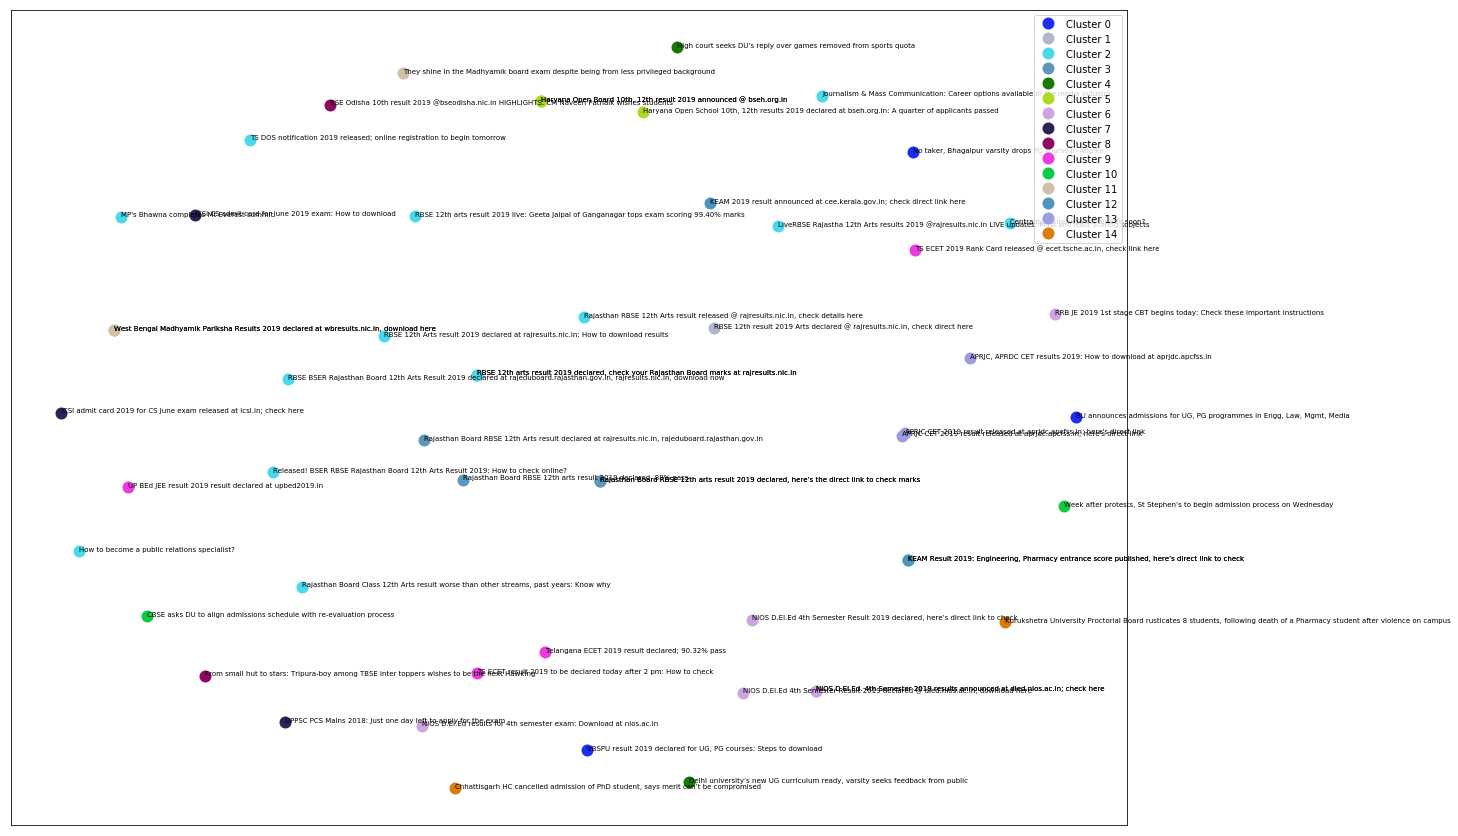

In [50]:
fig, ax = plt.subplots(figsize=(20, 15))

for name,group in groups:
    ax.plot(group.x, group.y, marker='o',linestyle='',ms=12, label=cluster_names[name],color=cluster_colors[name],mec='none')
    ax.set_aspect('auto')   
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
ax.legend(numpoints=1)

for i in range(len(df_plot)):
    ax.text(df_plot.iloc[i]['x'], df_plot.iloc[i]['y'], df_plot.iloc[i]['title'], size=7)

### Closest Point to Centroid

In [51]:
centers = np.array(km.cluster_centers_)


In [52]:
#data_99 = [ j for j, cluster in enumerate(clusters) if cluster == 1 ]


In [53]:
#cluster_tf_matrix = np.zeros( (  len(data_99) , centers.shape[1] ) )
#cluster_tf_matrix

In [54]:
#for row_num, data in enumerate(data_99):
 #       row = tfidf_matrix[data]
  #      cluster_tf_matrix[row_num] = row

In [55]:
#clostest_data = []
#for i in range(num_clusters):
 #   center = centers[i]
  #  data_i = [ j for j, cluster in enumerate(clusters) if cluster == i ]
    
    
   # cluster_tf_matrix = np.zeros( (  len(data_i) , centers.shape[1] ) )
    #for row_num, data in enumerate(data_i):
     #   row = tfidf_matrix[data]
      #  cluster_tf_matrix[row_num] = row

## Final Result

In [56]:
df.head()

,Newspaper,Heading,Date,Time,URL,Cluster
0,Hindiustan Times,"KEAM Result 2019: Engineering, Pharmacy entran...",2019-05-22,12:53:00,https://www.hindustantimes.com/education/keam-...,12
1,Hindiustan Times,Rajasthan Board RBSE 12th arts result 2019 dec...,2019-05-22,15:19:00,https://www.hindustantimes.com/education/rajas...,3
2,Hindiustan Times,"RBSE 12th arts result 2019 declared, check you...",2019-05-22,15:19:00,https://www.hindustantimes.com/education/rbse-...,2
3,Hindiustan Times,"No taker, Bhagalpur varsity drops PG course in...",2019-05-22,18:14:00,https://www.hindustantimes.com/education/no-ta...,0
4,Hindiustan Times,NIOS D.El.Ed 4th Semester Result 2019 declared...,2019-05-22,17:33:00,https://www.hindustantimes.com/education/nios-...,6


In [57]:
Result = df.sort_values('Cluster').groupby(['Cluster']).first()


In [58]:
Result


,Newspaper,Heading,Date,Time,URL
Cluster,,,,,
0,Hindiustan Times,"No taker, Bhagalpur varsity drops PG course in...",2019-05-22,18:14:00,https://www.hindustantimes.com/education/no-ta...
1,Time of India,RBSE 12th result 2019 Arts declared @ rajresul...,2019-05-22,19:48:00,https://timesofindia.indiatimes.com/home/educa...
2,Indian Express,Rajasthan Board Class 12th Arts result worse t...,2019-05-22,4:55:12 pm,https://indianexpress.com/article/education/ra...
3,Hindiustan Times,Rajasthan Board RBSE 12th arts result 2019 dec...,2019-05-22,15:19:00,https://www.hindustantimes.com/education/rajas...
4,Indian Express,"Delhi university’s new UG curriculum ready, va...",2019-05-22,8:00:28 pm,https://indianexpress.com/article/education/de...
5,Indian Express,"Haryana Open School 10th, 12th results 2019 de...",2019-05-22,1:37:14 pm,https://indianexpress.com/article/education/ha...
6,Time of India,RRB JE 2019 1st stage CBT begins today: Check ...,2019-05-22,10:03:00,https://timesofindia.indiatimes.com/home/educa...
7,Indian Express,ICSI CS admit card for June 2019 exam: How to ...,2019-05-22,4:50:58 pm,https://indianexpress.com/article/education/ic...
8,Indian Express,BSE Odisha 10th result 2019 @bseodisha.nic.in ...,2019-05-22,11:11:02 am,https://indianexpress.com/article/education/0b...


Determining Number of Clusters using silhouette score

In [79]:
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

In [59]:
no_clusters = list (range (12,25))

In [131]:
for n in n_clusters:
    km_ss = KMeans(n_clusters=n)
    #km_ss.fit(tfidf_matrix) 
    clusters_ss = km_ss.fit_predict(dist)
    #centers_ss = km_ss.cluster_centers_ 
    score = silhouette_score(dist,clusters_ss)
    print ("For n = {}, silhouette score is {})".format(n, score))

For n = 12, silhouette score is 0.235208693300523)
For n = 13, silhouette score is 0.23202801801612946)
For n = 14, silhouette score is 0.2342098841770144)
For n = 15, silhouette score is 0.2440317599610725)
For n = 16, silhouette score is 0.25090143272393156)
For n = 17, silhouette score is 0.2427825266077204)
For n = 18, silhouette score is 0.2563973433488523)
For n = 19, silhouette score is 0.23745877767344972)
For n = 20, silhouette score is 0.2625589152385553)
For n = 21, silhouette score is 0.2774026987294956)
For n = 22, silhouette score is 0.26576936312559424)
For n = 23, silhouette score is 0.2631812227922686)
For n = 24, silhouette score is 0.2600129504753829)


In [128]:
score

0.264863917008563

In [116]:
type(dist)

numpy.ndarray

array([[ 0.00000000e+00,  7.55919797e-01,  9.78311711e-01, ...,
         9.93343086e-01,  9.93585646e-01,  9.77854036e-01],
       [ 7.55919797e-01, -2.22044605e-16,  6.15136897e-01, ...,
         9.54123697e-01,  9.60685592e-01,  9.74270777e-01],
       [ 9.78311711e-01,  6.15136897e-01, -4.44089210e-16, ...,
         9.51303351e-01,  9.58268654e-01,  9.72689017e-01],
       ...,
       [ 9.93343086e-01,  9.54123697e-01,  9.51303351e-01, ...,
        -6.66133815e-16,  9.92248482e-01,  9.11216486e-01],
       [ 9.93585646e-01,  9.60685592e-01,  9.58268654e-01, ...,
         9.92248482e-01, -6.66133815e-16,  9.91922723e-01],
       [ 9.77854036e-01,  9.74270777e-01,  9.72689017e-01, ...,
         9.11216486e-01,  9.91922723e-01, -4.44089210e-16]])